A superstore is planning for the year-end sale. They want to launch a new offer - gold membership, that gives a 20% discount on all purchases, for only $499 which is $999 on other days. It will be valid only for existing customers and the campaign through phone calls is currently being planned for them. The management feels that the best way to reduce the cost of the campaign is to make a predictive model which will classify customers who might purchase the offer.


<h5>Objective</h5>
The superstore wants to predict the likelihood of the customer giving a positive response and wants to identify the different factors which affect the customer's response. You need to analyze the data provided to identify these factors and then build a prediction model to predict the probability of a customer will give a positive response.


use xgboost, decision tree and random forest

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [170]:
data = pd.read_csv('dataset\superstore_data (1).csv')

In [171]:
store = data.copy()
store

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,18,126,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,10,13,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,2,88,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,38,701,149,165,63,1,5,4,10,3,0,0


In [172]:
# to check for duplicate rows
dp = pd.DataFrame(data)
duplicates = dp[dp.duplicated()]
print ('Duplicate rows:')
print(duplicates)

Duplicate rows:
Empty DataFrame
Columns: [Id, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Response, Complain]
Index: []


In [173]:
# to check for duplicate rows >>>>>>>> True or False
data.duplicated().any()

False

In [174]:
data['Id'].unique()

array([ 1826,     1, 10476, ...,    22,   528,  4070], dtype=int64)

In [175]:
pd.set_option('display.max_columns', None)
store

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,18,126,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,10,13,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,2,88,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,38,701,149,165,63,1,5,4,10,3,0,0


In [176]:
store.dtypes

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

# Data Cleaning

In [177]:
store['Dt_Customer'] = pd.to_datetime(store['Dt_Customer'], errors = 'coerce')

In [178]:
store.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [179]:
store['Income'].fillna(store['Income'].median(), inplace = True)

# Feature Selection

In [180]:
cat = store.select_dtypes(include = ['category', 'object'])
num = store.select_dtypes(include = 'number')
display(cat.head())
display(num.head())

,Education,Marital_Status
0,Graduation,Divorced
1,Graduation,Single
2,Graduation,Married
3,Graduation,Together
4,Graduation,Single


,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0


In [181]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
def transform(dataframe):
    # scale the numerical columns
    removeY = dataframe.drop(['Response'], axis = 1)
    for i in removeY.columns: 
        if i in dataframe.select_dtypes(include = 'number').columns: 
            dataframe[[i]] = scaler.fit_transform(dataframe[[i]])
    # label encode the categorical columns
    for i in dataframe.columns:
        if i in dataframe.select_dtypes(include = ['object', 'category']).columns:
            dataframe[i] = lb.fit_transform(dataframe[i])
    return dataframe

transform(store)
store.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,-1.160269,0.099671,2,2,1.302195,-0.825218,-0.929894,2014-06-16,-1.696001,-0.341540,1.953945,0.939667,1.345274,3.923722,3.335739,-0.685887,-0.030532,0.457817,0.064556,-1.779198,1,-0.097282
1,-1.722510,-0.651494,2,4,0.193870,-0.825218,-0.929894,2014-06-15,-1.696001,0.475643,-0.535709,-0.456207,-0.558902,-0.655733,-0.134633,-0.685887,1.049345,0.115638,0.372226,-0.130463,1,-0.097282
2,1.504601,-0.901882,2,3,0.600384,-0.825218,0.906934,2014-05-13,-1.696001,-0.504976,-0.384821,-0.478364,-0.412427,-0.607273,-0.268846,-0.685887,-0.390491,-0.226541,-0.243114,-1.367014,0,-0.097282
3,-1.295823,-0.150717,2,5,-0.789537,1.032559,0.906934,2014-11-05,-1.696001,-0.873451,-0.661449,-0.735382,-0.687068,-0.655733,-0.844046,-0.685887,-1.110409,-0.910898,-1.166125,0.693904,0,-0.097282
4,-0.068134,1.685463,2,4,-1.228968,1.032559,-0.929894,2014-08-04,-1.696001,-0.885337,-0.259081,-0.633461,-0.485665,-0.655733,-0.192153,-0.168236,-0.390491,-0.568720,-1.166125,0.693904,1,-0.097282


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

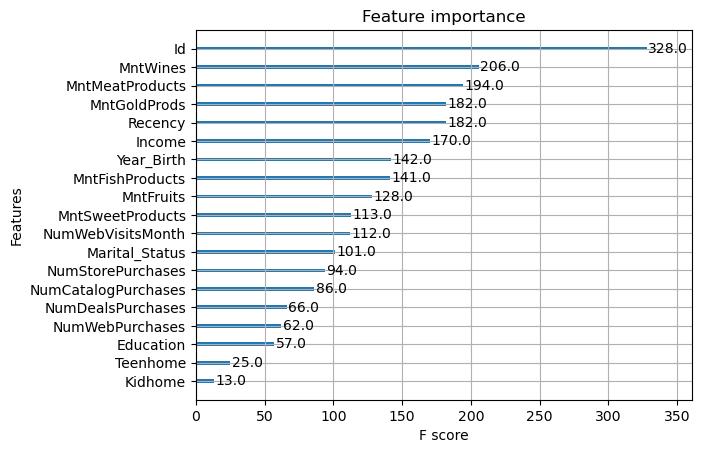

In [182]:
import xgboost as xgb
x = store.drop(['Response', 'Dt_Customer'], axis = 1) 
y = store.Response

model = xgb.XGBClassifier()
model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model)

In [183]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
best_feature1 = SelectKBest(score_func = f_classif, k = 'all')
fitting1 = best_feature1.fit(x,y)
scores1 = pd.DataFrame(fitting1.scores_)
columns1 = pd.DataFrame(x.columns)
feat_score1 = pd.concat([columns1, scores1], axis = 1)
feat_score1.columns = ['Feature', 'F_classif_score']
k1 = feat_score1.nlargest(11, 'F_classif_score')

k1.sort_values(by = 'F_classif_score', ascending = False)

,Feature,F_classif_score
8,MntWines,145.728750
10,MntMeatProducts,132.396830
16,NumCatalogPurchases,114.711734
7,Recency,91.738346
6,Teenhome,54.688509
15,NumWebPurchases,50.625517
13,MntGoldProds,44.644092
4,Income,40.219106
9,MntFruits,35.690773
12,MntSweetProducts,31.261719


In [184]:
store.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [185]:
select_cols = ['MntWines', 'MntMeatProducts', 'Recency', 'Income', 'MntGoldProds', 'MntFishProducts', 'MntFruits',
                'MntSweetProducts', 'NumWebVisitsMonth', 'NumCatalogPurchases']

x = store[select_cols]
y = store.Response

In [186]:
x

,MntWines,MntMeatProducts,Recency,Income,MntGoldProds,MntFishProducts,MntFruits,MntSweetProducts,NumWebVisitsMonth,NumCatalogPurchases
0,-0.341540,0.939667,-1.696001,1.302195,3.335739,1.345274,1.953945,3.923722,-1.779198,0.457817
1,0.475643,-0.456207,-1.696001,0.193870,-0.134633,-0.558902,-0.535709,-0.655733,-0.130463,0.115638
2,-0.504976,-0.478364,-1.696001,0.600384,-0.268846,-0.412427,-0.384821,-0.607273,-1.367014,-0.226541
3,-0.873451,-0.735382,-1.696001,-0.789537,-0.844046,-0.687068,-0.661449,-0.655733,0.693904,-0.910898
4,-0.885337,-0.633461,-1.696001,-1.228968,-0.192153,-0.485665,-0.259081,-0.655733,0.693904,-0.568720
...,...,...,...,...,...,...,...,...,...,...
2235,0.202258,-0.181464,1.722981,0.568785,0.651474,0.173473,-0.208785,0.507303,-0.542647,-0.226541
2236,-0.888309,-0.682206,1.722981,-0.846184,-0.537273,-0.632140,-0.409969,-0.461894,1.106087,-0.910898
2237,-0.353426,-0.349855,1.722981,-0.236812,-0.575619,-0.412427,-0.611153,-0.534583,1.106087,-0.568720
2238,-0.109757,2.366561,1.722981,0.542539,0.363874,2.041031,0.294176,3.342204,-0.954831,0.457817


In [187]:
# split in train and test

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 40, stratify = y)

**DECISION TREE**

It is supervised learning technique which can be used for both classification and regression problems, but mostly it is preferred  for solving Classification problems.

It is a tree-structured classifier, where **internal nodes represent the features of a datatset, branches represent the decision rules and external nodes represents the outcome.**

**Terminologies**


**Root Nodes**: is from where the decision tree starts. it represents the entire dataset, which further gets divided into 2 or more homogeneous sets.


**Leaf Nodes**: are final output node, and the tree cannot be segregated further after getting a leaf node.


**Decision Nodes**: are used to make any decision and have multiple branches.


**Branch/Sub Tree**: A tree formed by splitting the tree.


**Pruning**: it is the process of removing the unwanted branched from the tree.


**Parent/Child Node**: the root node of the tree is called the parent node and the other nodes are called the child nodes.


**Impurity**



In [188]:
# fitting decision tree model on data
from sklearn.tree import DecisionTreeClassifier
response_classifier = DecisionTreeClassifier(max_leaf_nodes = 10, random_state = 0)
response_classifier.fit(xtrain, ytrain)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [189]:
# # Decision tree is highly sensitive to the train data which could result to high variance

# # predicting values on test set
# res_pred = response_classifier.predict(xtest)

In [190]:
# # checking test accuracy
# accuracy_score(ytest,res_pred)*100

In [191]:
# # -----------confusion metrix---------------
# confusion_matrix(ytest, res_pred)

In [199]:
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier instance
treeModel = DecisionTreeClassifier()

# Fit the model to your training data
treeModel.fit(xtrain, ytrain)

# Make predictions on new data
train_preds = treeModel.predict(xtrain)

print(f"The Train Prediction is {train_preds}")

# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(ytest, predictions)
# print("Accuracy:", accuracy)




The Train Prediction is [0 1 0 ... 0 0 0]


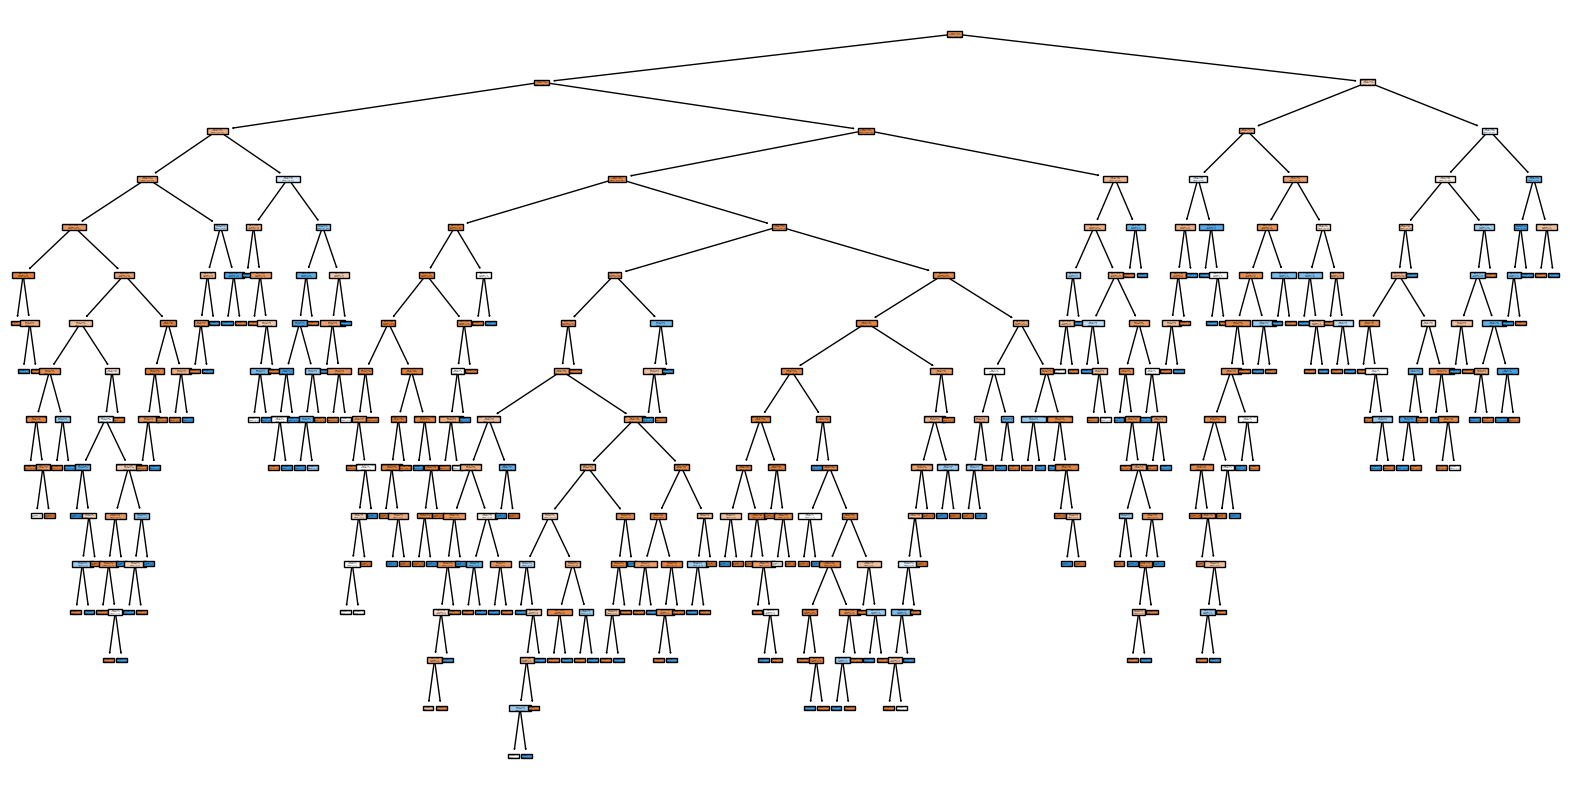

In [200]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(treeModel, filled=True, feature_names=xtrain.columns)
plt.show()

In [201]:
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier instance
treeModel = DecisionTreeClassifier()

# Fit the model to your training data
treeModel.fit(xtrain, ytrain)

# Make predictions on new data
test_preds = treeModel.predict(xtest)

print(test_preds)

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0]


In [ ]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(treeModel, filled=True, feature_names=xtest.columns)
plt.show()


In [204]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(ytrain, train_preds)
print("Accuracy:", train_accuracy)


Accuracy: 0.9921875


<Axes: >

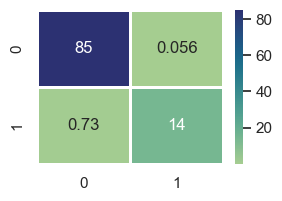

In [207]:
reveal = confusion_matrix(ytrain, train_preds)
plt.figure(figsize= (3,2))
sns.set(style = 'dark')
sns.heatmap(reveal/np.sum(reveal)*100, annot =True, cmap = 'crest', linewidth=1)


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

 #create a RandomForestClassifirer instance
forestclas = RandomForestClassifier(criterion = "gini", max_depth=8, min_samples_split= 10, random_state= 5)

# #  fit the model to the training data
forestclas.fit(xtrain, ytrain)

# # make predictions on the training data
# train_pred = forestModel.predict(xtrain)

# # print classification report
# print(classification_report(ytrain, train_pred))

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

 #create a RandomForestClassifirer instance
forestModel = RandomForestClassifier()

#  fit the model to the training data
forestModel.fit(xtrain, ytrain)

# make predictions on the training data
train_pred = forestModel.predict(xtrain)

# print classification report
print(classification_report(ytrain, train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1525
           1       0.99      0.96      0.97       267

    accuracy                           0.99      1792
   macro avg       0.99      0.98      0.98      1792
weighted avg       0.99      0.99      0.99      1792



In [ ]:
 #create a RandomForestClassifirer instance
fm = RandomForestClassifier()

#  fit the model to the test data
fm.fit(xtest, ytest)

# make predictions on the training data
test_pred = fm.predict(xtest)

# print classification report
print(classification_report(ytest, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       381
           1       1.00      0.99      0.99        67

    accuracy                           1.00       448
   macro avg       1.00      0.99      1.00       448
weighted avg       1.00      1.00      1.00       448



**KNN**

In [208]:
n_neighbors=20
scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(xtrain,ytrain)
    y_pred=knn.predict(xtest)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,ytest),2))
    scores.append(round(accuracy_score(y_pred,ytest),2))

Accuracy for k= 1 is: 0.85
Accuracy for k= 2 is: 0.85
Accuracy for k= 3 is: 0.85
Accuracy for k= 4 is: 0.85
Accuracy for k= 5 is: 0.85
Accuracy for k= 6 is: 0.85
Accuracy for k= 7 is: 0.85
Accuracy for k= 8 is: 0.86
Accuracy for k= 9 is: 0.86
Accuracy for k= 10 is: 0.86
Accuracy for k= 11 is: 0.85
Accuracy for k= 12 is: 0.85
Accuracy for k= 13 is: 0.86
Accuracy for k= 14 is: 0.85
Accuracy for k= 15 is: 0.84
Accuracy for k= 16 is: 0.86
Accuracy for k= 17 is: 0.83
Accuracy for k= 18 is: 0.84
Accuracy for k= 19 is: 0.83


In [209]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(xtrain,ytrain)
train_prediction = knn.predict(xtrain)
print(classification_report(ytrain, train_prediction))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1525
           1       0.79      0.20      0.32       267

    accuracy                           0.87      1792
   macro avg       0.84      0.60      0.63      1792
weighted avg       0.86      0.87      0.84      1792



[[1511   14]
 [ 213   54]]


<Axes: >

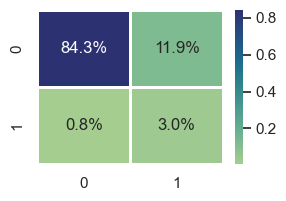

In [210]:
train_prediction = knn.predict(xtrain)
print(confusion_matrix(ytrain, train_prediction))

revealer = confusion_matrix(train_prediction, ytrain)
revealer
plt.figure(figsize = (3,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', fmt='.1%', linewidth=1)

In [ ]:
v

,Id,MntWines,MntMeatProducts,Recency,Income,MntGoldProds,MntFishProducts,MntFruits,MntSweetProducts,NumWebVisitsMonth,NumCatalogPurchases
1820,1.004283,0.246831,0.775707,1.066813,0.352585,2.607153,-0.687068,2.507202,0.434613,0.28172,0.457817


In [ ]:
v = xtest.head(1)
treeModel.predict(v)

array([0], dtype=int64)

In [ ]:
pd.concat([xtest, ytest], axis = 1)

,MntWines,MntMeatProducts,Recency,Income,MntGoldProds,MntFishProducts,MntFruits,MntSweetProducts,NumWebVisitsMonth,NumCatalogPurchases,Response
1820,0.246831,0.775707,1.066813,0.352585,2.607153,-0.687068,2.507202,0.434613,0.281720,0.457817,0
1122,0.428097,-0.589148,0.030758,0.675287,-0.096286,-0.577212,-0.560857,-0.558813,-0.130463,-0.568720,0
875,-0.870479,-0.717657,-0.383664,-0.745314,-0.824872,-0.687068,-0.661449,-0.655733,1.106087,-0.910898,0
753,-0.677327,-0.491658,-0.590875,-0.750388,-0.403059,-0.632140,-0.409969,-0.631503,1.106087,-0.910898,0
1674,-0.302909,-0.411894,0.859602,-0.283432,-0.575619,-0.485665,-0.535709,-0.534583,0.693904,-0.568720,0
...,...,...,...,...,...,...,...,...,...,...,...
2152,-0.870479,-0.722088,1.584841,-0.407671,-0.709832,-0.650449,-0.636301,-0.655733,0.693904,-0.910898,0
95,-0.718929,-0.544834,-1.592395,0.255990,-0.422233,-0.577212,-0.636301,-0.534583,-0.542647,-0.568720,0
302,0.478614,-0.154876,-1.281579,0.769445,-0.134633,1.803009,-0.032749,-0.655733,-0.542647,0.115638,0
1278,0.217116,1.653114,0.237969,0.807835,-0.652312,0.777683,-0.409969,0.071165,-1.779198,0.799996,0
